# Ecuaciones Diferenciales Parciales.

## Diferenciación numérica

Antes de Resolver ecuaciones parciales. Tenemos que hacer el programita de diferenciación numérica.

### Diferencias adelantadas y atrasadas. 

La definición de derivada es:
    $$
    \frac{df}{dx}=\lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}
    $$
En computación, no es posible tomar el límite, por lo que aproximamos a una $h$ muy pequeña
    $$
    \frac{df}{dx}\approx \frac{f(x+h)-f(x)}{h}
    $$
y a está trivial aproximación, la llamamos diferencias adelantadas.


Diferencias atrasadas, será la imagen espejo de la definición anterior.
    $$
    \frac{df}{dx}\approx \frac{f(x)-f(x-h)}{h}
    $$


![title](fig_1.png)

### Diferencias Centrales

Mejorando las aproximaciones de diferencias adelantadas y atrasadas. Una manera fácil es usar diferencias centradas. 
    $$
    \frac{df}{dx}\approx \frac{f(x+\frac{h}{2})-f(x-\frac{h}{2})}{h}
    $$

In [14]:
from math import *

def derivada(f,x, h = 1e-8):
    #pass
    return (f(x+h/2)-f(x-h/2))/h

print(derivada(cos,0)) # 0.0
print(derivada(cos,pi/2)) # -0.999999993923

0.0
-0.999999993922529


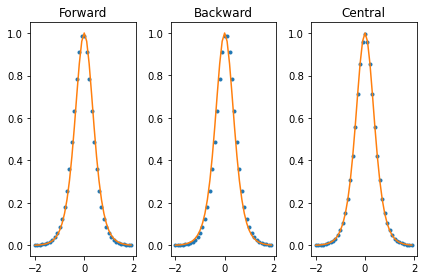

In [13]:
from pylab import *

def forward(f,x, h = 1e-4):
    return (f(x+h)-f(x))/h

def backward(f,x, h = 1e-4):
    return (f(x)-f(x-h))/h

def derivada(f,x, h = 1e-4):
    return (f(x+h/2)-f(x-h/2))/h

f=lambda x:1+0.5*tanh(2*x)
lista_forward=[]
lista_backward=[]
lista_derivada=[]
x=arange(-2,2,0.1)
for i in x:
    lista_forward.append(forward(f,i,1e-1))
    lista_backward.append(backward(f,i,1e-1))
    lista_derivada.append(derivada(f,i,1e-1))
    

subplot(1,3,1)
plot(x,lista_forward,'.')
plot(x,(1-tanh(2*x)**2),'-')
title('Forward')

subplot(1,3,2)
plot(x,lista_backward,'.')
plot(x,(1-tanh(2*x)**2))
title('Backward')

subplot(1,3,3)
plot(x,lista_derivada,'.')
plot(x,(1-tanh(2*x)**2))
title('Central')

tight_layout()
show()


### Segunda derivada

### ejercicio

Deducir la expresion para $\frac{d^2f}{dx^2}$ usando las expresiones usando la derivada para adelante para atras y la del punto medio.



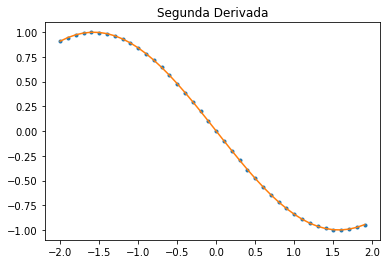

In [15]:
from pylab import *

def derivada_2(f,x, h = 1e-4):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

f=lambda x:sin(x)

lista_derivada_2=[]
x=arange(-2,2,0.1)
for i in x:
    lista_derivada_2.append(derivada_2(f,i,1e-1))

plot(x,lista_derivada_2,'.')
plot(x,(-sin(x)))
title('Segunda Derivada')

show()

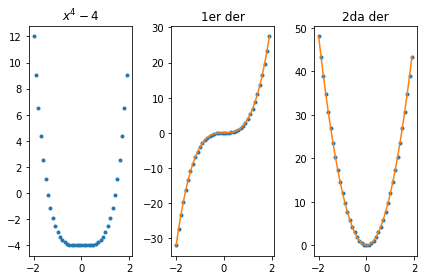

In [17]:
from pylab import *

def derivada(f,x, h = 1e-4):
    return (f(x+h/2)-f(x-h/2))/h

def derivada_2(f,x, h = 1e-4):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

f=lambda x:(x)**4-4

lista=[]
lista_derivada=[]
lista_derivada_2=[]
x=arange(-2,2,0.1)
for i in x:
    lista.append(f(i))
    lista_derivada.append(derivada(f,i))
    lista_derivada_2.append(derivada_2(f,i))

subplot(1,3,1)
plot(x,lista,'.')
title('$x^4-4$')
    
subplot(1,3,2)
plot(x,lista_derivada,'.')
plot(x,(4*x**3))
title('1er der')

subplot(1,3,3)
plot(x,lista_derivada_2,'.')
plot(x,(12*x**2))
title('2da der')

tight_layout()
show()

# Ecuaciones diferenciales Parciales

## Ecuación de Laplace

Potencial electrostático $\phi$ en ausencia de carga eléctrica está descrito por:

$$
\nabla^2 \phi =0
$$
que es la ecuación de Laplace. El operador $\nabla^2$ en cartesianas es: 
$$
\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2}
$$

Para resolver esta ecuación hay muchos métodos. El más sencillo es el método de relajación

### Método de relajación 

Sea una placa bidimensional como se muestra en la figura:
![title](fig_2.png)

Para hacer este desarrollo, usamos el método de diferencias finitas o el método de elemento finito, que es utilizar la fórmula de segunda derivada en cada dimensión.

$$
\frac{\partial^2\phi(x,y)}{\partial x^2} = \frac{\phi(x+a,y)-2\phi(x,y)+\phi(x-a,y)}{a^2}
$$

y

$$
\frac{\partial^2\phi(x,y)}{\partial y^2} = \frac{\phi(x,y+a)-2\phi(x,y)+\phi(x,y-a)}{a^2}
$$

Uniendo las dos parciales en la ecuación de Laplace, tenemos:

$$
\nabla^2 \phi= \frac{\partial^2\phi(x,y)}{\partial y^2} +\frac{\partial^2\phi(x,y)}{\partial y^2} = \frac{\phi(x+a,y)-2\phi(x,y)+\phi(x-a,y)}{a^2} + \frac{\phi(x,y+a)-2\phi(x,y)+\phi(x,y-a)}{a^2}=0
$$

Manipulando la expresión:

$$
\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=0
$$

Tenemos un mallado de cuadritos de tamaño $a$ y para cada cuadro hay que resolver está ecuación. Así que tenemos un sistema de N ecuaciones. Este sistema de ecuaciones se resuelven simultaneamente y lo haremos con el método de relajación.

$$
\phi(x,y) =\frac{1}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right]
$$

El problema que resolveremos es:
De la figura anterior, pensamos que la caja tiene 1m de lado y la parte de arriba está a V=1 volt, lo demás está aterrizado. Hacemos el espaciado del mallado (grid) de a=1 cm y N=100 puntos.

Nota: Tenemos que resolver un sistema de 100 ecuaciones lineales. 

### Ejercicio

Como seria el metodo para $\phi(x,y,z)$?

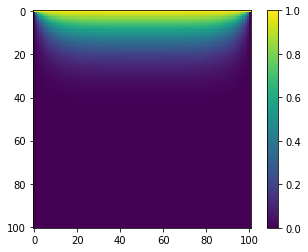

In [5]:
from pylab import *
M,V=100,1.0
# Ponemos el numero maximo de iteraciones
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
delta=1.0
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            if i==0 or i==M or j==0 or j==M:
                phi_1[i,j]=phi[i,j] #frontera
            else:
                phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

    phi,phi_1=phi_1,phi #actualizo los valores
    
imshow(phi)
#gray()
colorbar()
show()

#### Ejercicio

Modificar el codigo anterior para que tambien el lado derecho de la caja este a un potencial 1.

# Ecuación de Poisson

Resolvamos la ecuación de Poisson:
    
$$
\nabla ^2 \phi = -\frac{\rho}{\epsilon_0}
$$

![title](fig_3.png)

Con cargas metálicas con densidades de carga de 1 $Cm^{-2}$ y -1 $Cm^{-2}$

Podemos expresarla usando el metodo de relajacion:

$$
\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=-\frac{\rho(x,y)}{\epsilon_0}
$$

Re agrupando terminos podemos obtener una expresion para $\phi(x,y)$

$$
\phi(x,y) =\frac{1}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right] + \frac{a^2}{4\epsilon_0}\rho(x,y)
$$

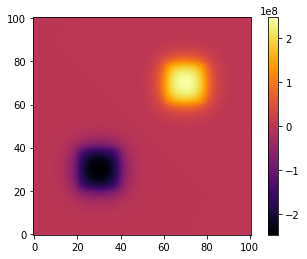

--- 3.854062795639038 segundos ---


In [18]:
from pylab import *
import time

t0 = time.time()

M,V=100,1.0

def ro2(x,y):
    if x>0.6 and x<0.8 and y>0.6 and y<0.8:
        return 1
    elif x>0.2 and x<0.4 and y>0.2 and y<0.4:
        return -1
    else:
        return 0
    
def ro3(x,y):
    c1=np.array([0.7,0.7])
    c2=np.array([0.3,0.3])
    myP=np.array([x,y])
    r=0.2
    if np.linalg.norm(c1-myP) <= r:
        return 1
    elif np.linalg.norm(c2-myP) <= r/2:
        return -1
    else:
        return 0


# Ponemos el numero maximo de iteraciones
maxIter = 100
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
a=0.01
epsilon=8.85e-12
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+\
                        phi[i,j-1])/4+(a**2)/(4*epsilon)*ro2(i*a,j*a)

    phi,phi_1=phi_1,phi #actualizo los valores
    

imshow(phi,origin='lower')
#set_cmap("Blues_r")
set_cmap("inferno")
colorbar()
show()
print("--- %s segundos ---" % (time.time()  -  t0))

### Ejercicio

Usando como base el ejemplo anterios hacer un Mickey Mouse.

# Ecuación de calor

Tiene la forma:

$$
\frac{\partial\phi(\mathbf{r},t)}{\partial t} = D\nabla^2\phi(\mathbf{r},t)
$$

En una dimensión es:

$$
\frac{\partial\phi(x,t)}{\partial t} = D\frac{\partial^2 \phi(x,t)}{\partial x^2}
$$

### El método FTCS

FTCS = Forward-Time Centered-Space 



Si usamos diferencias finitas centradas tenemos que:

$$
\frac{\partial^2 \phi(x,t)}{\partial x^2}= \frac{\phi(x+a,t)-\phi(x-a,t)+2\phi(x,t)}{a^2}
$$

Ahora para la parte temporal usaremos Euler (dif finit tienen error $h^2$):

$$
\frac{d\phi}{d t} = f(\phi,t)
$$

$$
\phi(t+h) \approx \phi(t) + h\frac{d\phi}{d t} =  \phi(t) + h f(\phi,t)
$$

Tenemos que:

$$
\phi(x,t+h)  = \phi(x,t) + h \frac{D}{a^2} \left[\phi(x+a,t)-\phi(x-a,t)+2\phi(x,t)\right]
$$


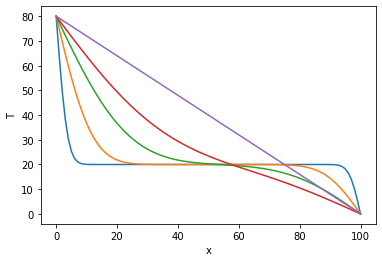

--- 9.181337356567383 segundos ---


In [19]:
from pylab import *
import time

t0 = time.time()
L=0.01
D=4.25e-6
M=100
A=L/M
h=1e-4 #pasos en el tiempo
epsilon=h/1000
T_baja=0.0
T_media=20.0
T_alta=80.0
t1=0.01
t2=0.1
t3=0.4
t4=1.0
t5=100.0
tfinal=t5+epsilon
T=empty(M+1,float)
T[0]=T_alta
T[M]=T_baja
T[1:M]=T_media
Tp=empty(M+1,float)
Tp[0]=T_alta
Tp[M]=T_baja
Tp[1:M]=T_media
t=0.0
c=h*D/(A*A)
while t<tfinal:
    Tp[1:M]=T[1:M]+c*(T[2:M+1]+T[0:M-1]-2*T[1:M])
    T,Tp=Tp,T
    t+=h
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)
xlabel('x')
ylabel('T')
show()
print("--- %5s segundos ---" % (time.time()  -  t0))